In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df= pd.read_excel("bank.xlsx")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [6]:
df['target']= df['y'].apply(lambda x: 1 if x=='yes' else 0)
df.drop('y', axis=1, inplace=True)


In [7]:
df['pdays']= df['pdays'].replace({-1:0})

In [8]:
df['balance']= df['balance'].apply(lambda x: 0 if x < 0 else x )

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,target
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1449.333997,15.915284,263.961292,2.793630,40.586154,0.542579,0.115240
std,10.576211,2993.725866,8.247667,259.856633,3.109807,99.787552,1.693562,0.319347
min,19.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,0.000000,0.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,0.000000,0.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,1.000000


In [10]:
categorical_columns = [x for x in df.dtypes.index if df.dtypes[x]=='object']
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
l= LabelEncoder()

In [13]:
for i in categorical_columns:
    df[i]=l.fit_transform(df[i])

In [14]:
x= df.iloc[:,0:(len(df.columns)-1)]
y= df.iloc[:,16]

In [15]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,0,0,3
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,0,0,3
4,59,1,1,1,0,0,1,0,2,5,8,226,1,0,0,3


Univariate Selection

Statistical tests can be used to select those features that have the strongest relationship with the output variable.

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

The example below uses the chi-squared (chi²) statistical test for non-negative features to select 10 of the best features from the Prediction Dataset.

In [1]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Score Functions in SelectKbest.

Default is  f_classif: ANOVA F-value between label/feature for classification tasks.

mutual_info_classif: Mutual information for a discrete target.

chi2: Chi-squared stats of non-negative features for classification tasks.

f_regression: F-value between label/feature for regression tasks.

mutual_info_regression: Mutual information for a continious target.

SelectPercentile: Select features based on percentile of the highest scores.

SelectFpr: Select features based on a false positive rate test.

SelectFdr: Select features based on an estimated false discovery rate.

SelectFwe: Select features based on family-wise error rate.

GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [17]:
kbest= SelectKBest(score_func=chi2, k=8)
kbest.fit(x,y)

SelectKBest(k=8, score_func=<function chi2 at 0x000000000A2B19D8>)

In [19]:
dfscores = pd.DataFrame(kbest.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [20]:
featureScores

,Specs,Score
0,age,24.969622
1,job,8.154597
2,marital,0.320397
3,education,3.802675
4,default,0.007543
5,balance,8594.262177
6,housing,21.500801
7,loan,19.045258
8,contact,100.510079
9,day,2.442553


In [21]:
print(featureScores.nlargest(10,'Score'))

       Specs          Score
11  duration  186041.898000
13     pdays   11950.694500
5    balance    8594.262177
14  previous     325.481961
8    contact     100.510079
12  campaign      58.504976
0        age      24.969622
6    housing      21.500801
7       loan      19.045258
10     month      12.325412


Feature Importance

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.


In [23]:
from sklearn.tree import ExtraTreeClassifier

In [24]:
best= ExtraTreeClassifier()
best.fit(x,y)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_split=1e-07, min_samples_leaf=1,
          min_samples_split=2, min_weight_fraction_leaf=0.0,
          random_state=None, splitter='random')

In [27]:
best.feature_importances_

array([ 0.08244305,  0.06330168,  0.04112975,  0.0456534 ,  0.00661687,
        0.07612876,  0.01358379,  0.00497265,  0.03307065,  0.10161634,
        0.08462021,  0.26520569,  0.05271138,  0.0460663 ,  0.04207748,
        0.040802  ])

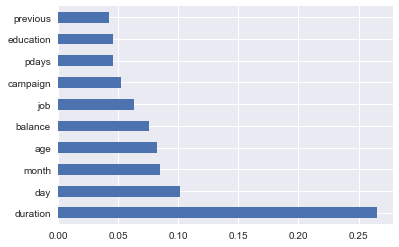

In [28]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(best.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [29]:
print(featureScores.nlargest(10,'Score'))

       Specs          Score
11  duration  186041.898000
13     pdays   11950.694500
5    balance    8594.262177
14  previous     325.481961
8    contact     100.510079
12  campaign      58.504976
0        age      24.969622
6    housing      21.500801
7       loan      19.045258
10     month      12.325412


In [ ]:
# df= pd.get_dummies(df, columns=categorical_columns, drop_first=True )

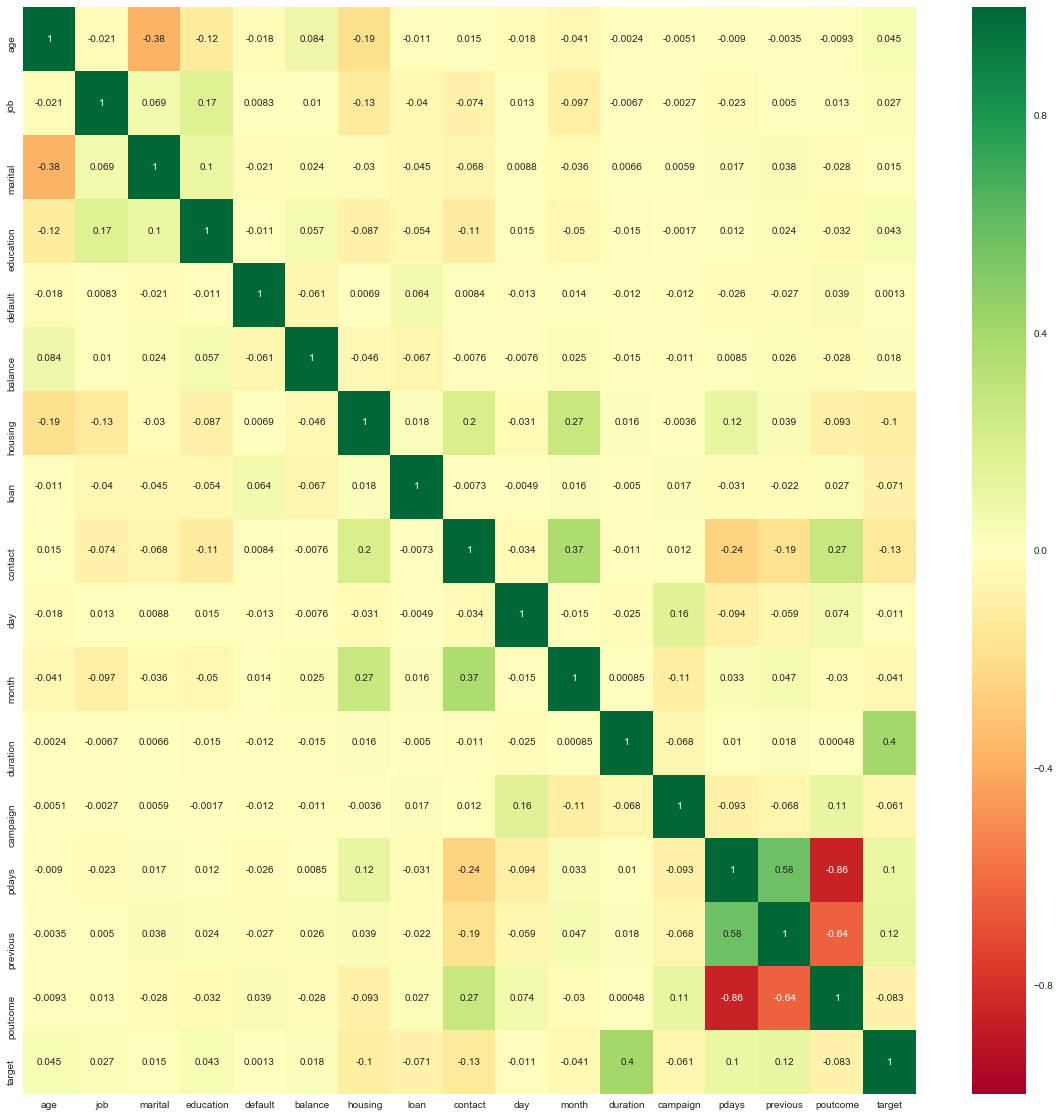

In [30]:
plt.figure(figsize=[20,20])
corrmat = df.corr()
top_corr_features = corrmat.index
sns.heatmap(data= df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
plt.show()